In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
cd /content/drive/MyDrive/YOYO

/content/drive/MyDrive/YOYO


In [22]:
ls


coco.names  image.jpg.png  yolov4.cfg  yolov4.weights


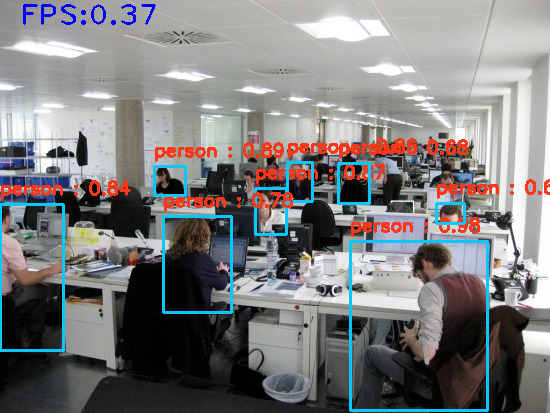

In [30]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/drive/MyDrive/YOYO/101.jpeg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
######modified
zero_indexes = [index for index, value in enumerate(classes) if value == 0]
classes = [classes[index] for index in zero_indexes]
scores = [scores[index] for index in zero_indexes]
boxes = [boxes[index] for index in zero_indexes]
######modified

fps=1/(y-x)
for (classid, score, box) in zip(classes, scores, boxes):
  if isinstance(classid, (list, np.ndarray)):
    classid_value = classid[0]
  else:
    classid_value = classid
# Check if score is a list or a scalar
  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)